## Численные методы, №6

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from pprint import pprint

In [2]:
def f(x): return np.log(x) - 1/np.power(x, 2)
a, b = 1, 6

## Встроенный метод трапеций

In [3]:
# Встроенный метод трапеций
I = np.trapz(f(np.linspace(a, b, 100)), np.linspace(a, b, 100))

## Формула левых прямоугольников

In [4]:
# Формула левых прямоугольников
def left_triangles_method(func, k = 10, interval = (1, 6)):
    n = np.power(2, k)
    h = (interval[1] - interval[0])/n
    value = 0
    for i in range(0, n):
        value += func(interval[0] + i * h)
    return value * h

## Расчет погрешностей по Рунге

In [5]:
def runge_err_est(integral, acc = (2, 10)):
    runge = dict()
    for i in range(acc[0], acc[1] + 1):
        runge[f'Z{i}'] = np.abs(integral - left_triangles_method(f))
    for i in range(acc[0], acc[1] + 1):
        runge[f'R{i}'] = np.abs(left_triangles_method(f, i) -\
                                left_triangles_method(f, i - 1))/3
    for i in range(acc[0] + 1, acc[1] + 1):
        runge[f'R_p/R_{i}'] = runge[f'R{i - 1}']/runge[f'R{i}']
    return runge

$O(h) = O(2^{k})$ - скорость сходимости метода левых квадратов

{'R10': 0.00225494488728728,
 'R2': 0.8150384687463813,
 'R3': 0.3643683538642386,
 'R4': 0.16554886013398828,
 'R5': 0.07762338308521037,
 'R6': 0.037419133947377205,
 'R7': 0.018353353689740004,
 'R8': 0.009087084899062662,
 'R9': 0.004521110200947476,
 'R_p/R_10': 2.004975920447623,
 'R_p/R_3': 2.236853063946546,
 'R_p/R_4': 2.2009716863609583,
 'R_p/R_5': 2.1327189508380293,
 'R_p/R_6': 2.0744302418749907,
 'R_p/R_7': 2.038817241793551,
 'R_p/R_8': 2.0197185228932066,
 'R_p/R_9': 2.009923336342987,
 'Z10': 0.006153552892457448,
 'Z2': 0.006153552892457448,
 'Z3': 0.006153552892457448,
 'Z4': 0.006153552892457448,
 'Z5': 0.006153552892457448,
 'Z6': 0.006153552892457448,
 'Z7': 0.006153552892457448,
 'Z8': 0.006153552892457448,
 'Z9': 0.006153552892457448}


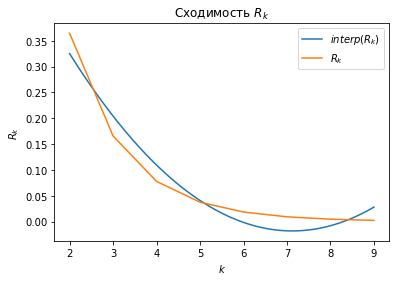

In [6]:
R = runge_err_est(I)
pprint(R)
R = list(runge_err_est(I).values())

# Интерполяция полиномом 2 степени
p2 = np.poly1d(np.polyfit(np.arange(2, 10), R[10:18], 2))
plt.plot(np.linspace(2, 9, 100), p2(np.linspace(2, 9, 100)), label = r'$interp(R_{k})$')

plt.plot(np.arange(2, 10), R[10:18], label = r'$R_{k}$')
plt.title(r'Сходимость $R_{k}$')
plt.xlabel(r'$k$')
plt.ylabel(r'$R_{k}$')
plt.legend()


## Квадратурная формула Гаусса для двух узлов

In [7]:
# Квадратурная формула Гаусса для двух узлов
def quad_gauss_formula(interval = (1, 6), func = f):
    G = (interval[1] - interval[0]) * \
    (func(interval[0] + (interval[1] - interval[0]) * 0.21132487) +\
    func(interval[0] + (interval[1] - interval[0]) * 0.78867513))/2
    return G
    

In [8]:
np.abs(I - quad_gauss_formula()) # ~ 2^4 узлов 

0.18780059462264465